# Future weather models 

Create synthetic future weather data up to 2100 by using climate projections by DWD: 

https://www.dwd.de/DE/klimaumwelt/klimaatlas/klimaatlas_node.html;jsessionid=D84E870D1392681BE23498BDEFDD6364.live11043


In [1]:
from toolbox import *

import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

pd.set_option('display.max_rows', 100)


## Load data

In [3]:
w = pd.read_csv('./data/weather_collections/weather_daily_region.csv')

# change date column to datetime type
w.date = pd.to_datetime(w.date)

# restrict data to the reference period 1971-2000
w = w.loc[w['date'] >= pd.to_datetime('1971-01-01')]
w = w.loc[w['date'] <= pd.to_datetime('2000-12-31')]

# set datetime index
w.set_index('date', inplace=True)
#w['date'] = w.index
w

,station_id_count,precip_mean,precip_min,precip_max,precip_std,tmean_mean,tmean_min,tmean_max,tmean_std,tmax_mean,...,tmax_max,tmax_std,tmin_mean,tmin_min,tmin_max,tmin_std,moisture_mean,moisture_min,moisture_max,moisture_std
date,,,,,,,,,,,,,,,,,,,,,
1971-01-01,7,0.028571,0.0,0.2,0.075593,-11.385714,-13.5,-10.2,1.175342,-6.228571,...,-4.4,1.443046,-14.471429,-17.5,-12.7,1.715337,83.000000,80.0,87.0,3.162278
1971-01-02,7,0.400000,0.0,1.0,0.424264,-8.042857,-9.3,-7.4,0.723089,-6.257143,...,-5.5,0.475595,-14.828571,-17.5,-12.1,1.829129,82.333333,79.0,88.0,3.076795
1971-01-03,7,0.757143,0.2,2.0,0.618755,-5.857143,-6.5,-4.7,0.699660,-4.628571,...,-2.7,1.338798,-8.242857,-10.1,-7.3,1.008063,86.500000,84.0,93.0,3.271085
1971-01-04,7,0.128571,0.0,0.5,0.179947,-5.414286,-6.2,-4.7,0.636209,-4.057143,...,-2.5,0.832380,-6.171429,-7.3,-5.2,0.809762,88.000000,84.0,94.0,3.794733
1971-01-05,7,0.000000,0.0,0.0,0.000000,-9.100000,-12.7,-7.3,1.940790,-5.414286,...,-4.0,0.971989,-11.357143,-15.0,-8.6,2.428894,87.666667,85.0,91.0,2.658320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-12-27,5,1.320000,0.0,1.9,0.828855,4.520000,4.0,5.2,0.540370,6.820000,...,8.2,0.861394,1.360000,0.2,2.6,1.080740,95.000000,93.0,98.0,2.000000
2000-12-28,5,0.060000,0.0,0.2,0.089443,3.100000,0.0,4.3,1.752142,5.920000,...,6.8,0.653452,1.260000,-1.5,2.7,1.697940,78.200000,71.0,90.0,7.596052
2000-12-29,5,4.280000,3.0,6.5,1.347961,0.160000,-1.4,1.0,0.928978,2.560000,...,3.9,1.663731,-1.060000,-2.1,0.0,0.756968,95.200000,92.0,97.0,1.923538


<Axes: xlabel='date', ylabel='tmean_mean'>

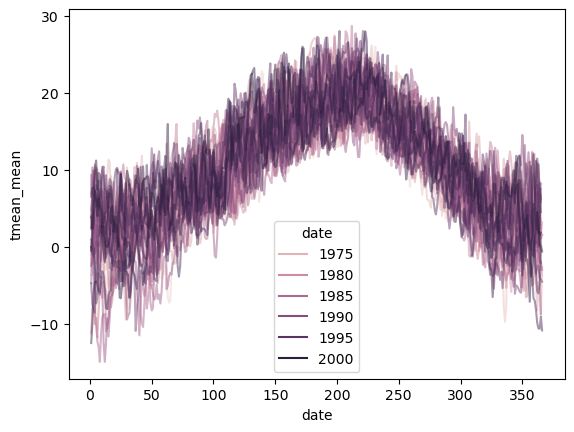

In [4]:
sns.lineplot(data=w, x=w.index.dayofyear, y='tmean_mean',
             hue=w.index.year,
             alpha=0.5)
#plt.xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2000-12-31'))
#plt.xlim(0,365)

# Addition model

This approach simply takes the weather data of the reference period 1971-2000, shifts it 100 years to the future (2070-2100) and adds expected changes in Temperature and Precipitation. 
These are taken from DWD Klimaatlas: https://www.dwd.de/DE/klimaumwelt/klimaatlas/

## Shift by 100 years

not needed!

In [5]:
s = w[['tmean_mean', 'precip_mean', 'moisture_mean']]

In [6]:
#s.index = s.index + pd.offsets.DateOffset(years=100)

In [7]:
s

,tmean_mean,precip_mean,moisture_mean
date,,,
1971-01-01,-11.385714,0.028571,83.000000
1971-01-02,-8.042857,0.400000,82.333333
1971-01-03,-5.857143,0.757143,86.500000
1971-01-04,-5.414286,0.128571,88.000000
1971-01-05,-9.100000,0.000000,87.666667
...,...,...,...
2000-12-27,4.520000,1.320000,95.000000
2000-12-28,3.100000,0.060000,78.200000
2000-12-29,0.160000,4.280000,95.200000


## Define future values

In [8]:
scenarios = {
    'add_ref': {'t_change': 0,
                'p_change': 1.0},
    'add_t+4_p+10': {'t_change': 4,
                     'p_change': 1.1},
    'add_t+4_p-10': {'t_change': 4,
                     'p_change': 0.9},
            }

In [9]:
for sc in scenarios:
    df = s.copy()
    print(sc)
    df.loc[:, 'tmean_mean'] = df.loc[:, 'tmean_mean'] + scenarios[sc]['t_change']
    df.loc[:, 'precip_mean'] = df.loc[:, 'precip_mean'] * scenarios[sc]['p_change']
    df = calc_cumulative_weather(df)
    df = df.resample('W').mean()
    df['date'] = df.index
    scenarios[sc]['data'] = df
    if True:
        df.to_csv(f'./data/weather_future/{sc}.csv', index=False)

add_ref
add_t+4_p+10
add_t+4_p-10


In [10]:
#scenarios['ref']['data']
#scenarios['add_t+4_p+10']['data']

## Check data

In [11]:
scenarios['add_ref']['data'].resample('W').mean()

,tmean_mean,precip_mean,moisture_mean,precip_mean_prev_2d_sum,tmean_mean_prev_2d_mean,precip_mean_prev_7d_sum,tmean_mean_prev_7d_mean,precip_mean_prev_30d_sum,tmean_mean_prev_30d_mean,precip_mean_prev_90d_sum,tmean_mean_prev_90d_mean,precip_mean_prev_1y_sum,tmean_mean_prev_1y_mean,precip_mean_prev_3y_sum,tmean_mean_prev_3y_mean,date
date,,,,,,,,,,,,,,,,
1971-01-03,-8.428571,0.395238,83.944444,0.792857,-8.332143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971-01-03
1971-01-10,-6.220408,0.020408,81.952381,0.148980,-6.475510,0.917857,-7.161735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971-01-10
1971-01-17,-1.751020,0.010204,81.404762,0.020408,-2.045918,0.028571,-3.718950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971-01-17
1971-01-24,3.761224,2.859184,85.238095,4.489796,3.426531,8.132653,1.376676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971-01-24
1971-01-31,4.926531,2.632653,79.547619,6.493878,5.211224,26.146939,5.512536,39.828571,-0.528333,NaN,NaN,NaN,NaN,NaN,NaN,1971-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-12-03,7.805714,0.482857,90.457143,1.242857,7.771429,10.014286,6.843265,74.528571,6.734857,200.665714,11.056032,852.554286,11.181840,2205.902143,10.858281,2000-12-03
2000-12-10,7.657143,2.428571,89.314286,3.725714,7.528571,6.951429,7.485306,61.314286,6.598762,189.385714,10.498794,844.837143,11.222865,2204.410714,10.896309,2000-12-10
2000-12-17,7.620000,1.454286,78.971429,3.771429,8.092857,15.462857,8.901633,50.791429,7.090000,186.945714,9.831587,810.545714,11.299616,2202.687857,10.924773,2000-12-17


In [12]:
base = scenarios['add_ref']['data']
scen = scenarios['add_t+4_p-10']['data']

In [13]:
base.resample('Y').mean().describe()[['tmean_mean_prev_1y_mean', 'precip_mean_prev_1y_sum']]

,tmean_mean_prev_1y_mean,precip_mean_prev_1y_sum
count,29.000000,29.000000
mean,10.083347,697.125462
min,8.899435,550.925042
25%,9.741593,629.696546
50%,10.142829,686.260086
75%,10.498974,766.491444
max,11.104161,858.314011
std,0.617339,87.578719


In [14]:
scen.resample('Y').mean().describe()[['tmean_mean_prev_1y_mean', 'precip_mean_prev_1y_sum']]

,tmean_mean_prev_1y_mean,precip_mean_prev_1y_sum
count,29.000000,29.000000
mean,14.083347,627.412916
min,12.899435,495.832538
25%,13.741593,566.726892
50%,14.142829,617.634078
75%,14.498974,689.842300
max,15.104161,772.482610
std,0.617339,78.820847


## Plot weather

In [15]:
base = scenarios['add_ref']['data']
scen = scenarios['add_t+4_p-10']['data']

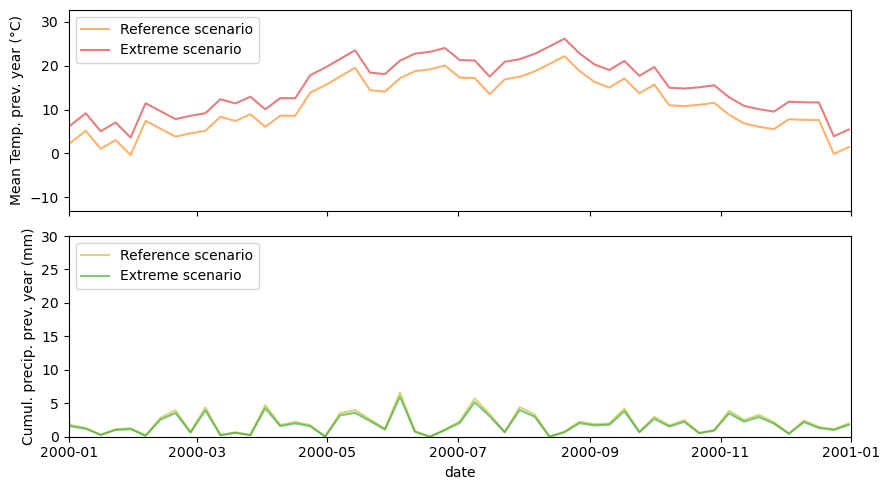

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(9,5), sharex=True)

sns.lineplot(data=base, x="date", y="tmean_mean", 
             #errorbar='sd', 
             color='tab:orange', alpha=0.6, ax=axs[0],
            label='Reference scenario')
sns.lineplot(data=scen, x="date", y="tmean_mean", 
             #errorbar='sd', 
             color='tab:red', alpha=0.6, ax=axs[0],
            label='Extreme scenario')
axs[0].set_ylabel('Mean Temp. prev. year (°C)')

sns.lineplot(data=base, x="date", y="precip_mean", 
             #errorbar='sd', 
             color='tab:olive', alpha=0.6, ax=axs[1],
            label='Reference scenario')
sns.lineplot(data=scen, x="date", y="precip_mean", 
             #errorbar='sd', 
             color='tab:green', alpha=0.6, ax=axs[1],
            label='Extreme scenario')
axs[1].set_ylabel('Cumul. precip. prev. year (mm)')
axs[1].set_ylim(0, 30)

for ax in axs:
    ax.set_xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2001-01-01'))
    ax.legend(loc='upper left')

plt.tight_layout()

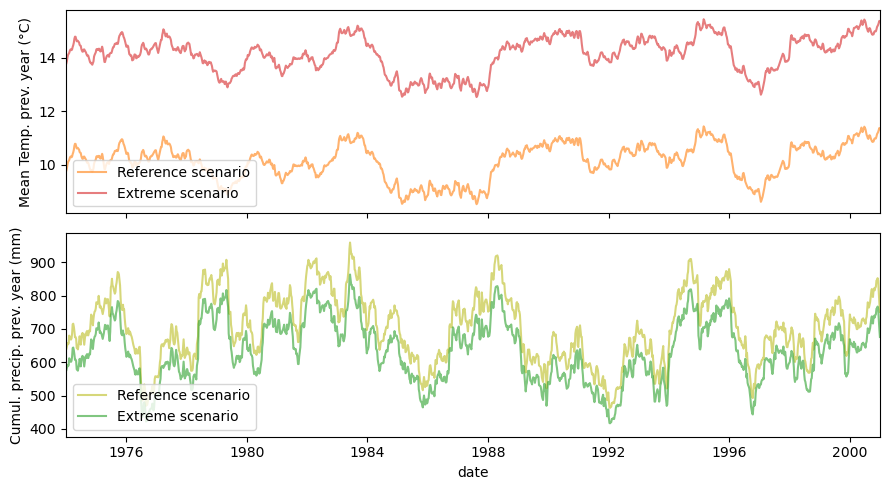

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(9,5), sharex=True)

sns.lineplot(data=base, x="date", y="tmean_mean_prev_1y_mean", 
             #errorbar='sd', 
             color='tab:orange', alpha=0.6, ax=axs[0],
            label='Reference scenario')
sns.lineplot(data=scen, x="date", y="tmean_mean_prev_1y_mean", 
             #errorbar='sd', 
             color='tab:red', alpha=0.6, ax=axs[0],
            label='Extreme scenario')
axs[0].set_ylabel('Mean Temp. prev. year (°C)')

sns.lineplot(data=base, x="date", y="precip_mean_prev_1y_sum", 
             #errorbar='sd', 
             color='tab:olive', alpha=0.6, ax=axs[1],
            label='Reference scenario')
sns.lineplot(data=scen, x="date", y="precip_mean_prev_1y_sum", 
             #errorbar='sd', 
             color='tab:green', alpha=0.6, ax=axs[1],
            label='Extreme scenario')
axs[1].set_ylabel('Cumul. precip. prev. year (mm)')

for ax in axs:
    ax.set_xlim(pd.to_datetime('1974'), pd.to_datetime('2001'))
    ax.legend(loc='lower left')

plt.tight_layout()

if True:
    plt.savefig(f"./figs/future_weather.png", bbox_inches='tight')

# Average model
## Create reference year from average

First iteration only with average values. Later try more elaborate calculations.

In [19]:
ref_year = w.groupby(by=[w.index.month.rename('month'),
                         w.index.day.rename('day')]
                    ).agg({'precip_mean': 'mean',
                          'moisture_mean': 'mean',
                          'tmean_mean': 'mean',
                          'precip_std': 'std',
                          'moisture_std': 'std',
                          'tmean_std': 'std',})

ref_year.reset_index(inplace=True)

In [20]:
ref_year['month'] = ref_year['month'].astype(str).str.zfill(2)
ref_year['day'] = ref_year['day'].astype(str).str.zfill(2)
ref_year['month_day'] = ref_year['month'] + '-' + ref_year['day']

In [21]:
#ref_year.info()

In [23]:
#ref_year['precip_mean']

In [24]:
#ref_year['precip_std'].quantile(0.05)#.median()

## Create weather scenarios

### Define values

In [25]:
start_year = 2000
years_range = range(0,50)

# following values from DWD Klimaatlas
# https://www.dwd.de/DE/klimaumwelt/klimaatlas/
scenarios = {
    'avg_t0_p0': {'ref_year': ref_year,
                  'y2y_t_change': 0, 
                  'y2y_p_change': 0,
                  'start_year': start_year,
                  'years_range': years_range,
                  'data': None},
    'avg_t+4_p+10': {'ref_year': ref_year,
                     'y2y_t_change': 4/100,
                     'y2y_p_change': 0.1/100,
                     'start_year': start_year,
                     'years_range': years_range,
                     'data': None},
    'avg_t+2_p+05': {'ref_year': ref_year,
                     'y2y_t_change': 2/100,
                     'y2y_p_change': 0.05/100,
                     'start_year': start_year,
                     'years_range': years_range,
                     'data': None},
    'avg_t+4_p-10': {'ref_year': ref_year,
                     'y2y_t_change': 4/100,
                     'y2y_p_change': -0.1/100,
                     'start_year': start_year,
                     'years_range': years_range,
                     'data': None},
    'avg_t-4_p+10': {'ref_year': ref_year,
                     'y2y_t_change': -4/100,
                     'y2y_p_change': 0.1/100,
                     'start_year': start_year,
                     'years_range': years_range,
                     'data': None},
            }

### Create timelines

In [26]:
for s_name in scenarios:
    print(s_name)
    ref_year = scenarios[s_name]['ref_year']
    start_year = scenarios[s_name]['start_year']
    years_range = scenarios[s_name]['years_range']
    y2y_t_change = scenarios[s_name]['y2y_t_change'] # °C absolute change per year
    y2y_p_change = scenarios[s_name]['y2y_p_change'] # relative change per year
    y_list = []

    for year in years_range:
        y = create_weather(ref_year, start_year, year, 
                           y2y_t_change, y2y_p_change, add_rand=True)
        y_list.append(y)
    
    s = pd.concat(y_list)
    s = calc_cumulative_weather(s)
    
    # drop first years with NaNs
    s = s.dropna()

    # reduce to weekly data
    s = s[s.index.dayofweek == 0]

    scenarios[s_name]['data'] = s

    if False:
        s.to_csv(f'./data/weather_future/{s_name}.csv', index=False)

avg_t0_p0
avg_t+4_p+10
avg_t+2_p+05
avg_t+4_p-10
avg_t-4_p+10


## Check data

In [27]:
data = scenarios['avg_t+4_p+10']['data']

<Axes: xlabel='date', ylabel='precip_mean_prev_3y_sum'>

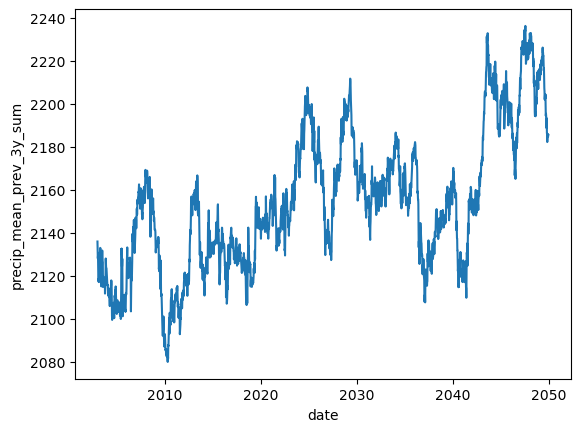

In [28]:
sns.lineplot(data=data, x='date', y='precip_mean_prev_3y_sum')
#plt.xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2000-12-31'))

In [29]:
data

,date,precip_mean,moisture_mean,tmean_mean,precip_std,moisture_std,tmean_std,precip_mean_prev_2d_sum,tmean_mean_prev_2d_mean,precip_mean_prev_7d_sum,tmean_mean_prev_7d_mean,precip_mean_prev_30d_sum,tmean_mean_prev_30d_mean,precip_mean_prev_90d_sum,tmean_mean_prev_90d_mean,precip_mean_prev_1y_sum,tmean_mean_prev_1y_mean,precip_mean_prev_3y_sum,tmean_mean_prev_3y_mean
date,,,,,,,,,,,,,,,,,,,
2002-12-30,2002-12-30,3.536639,84.403968,1.557443,1.849568,3.241120,0.370159,4.642863,1.672598,14.722428,2.231163,63.799807,2.639692,196.223594,5.784553,721.976728,10.159055,2135.916336,10.124263
2003-01-06,2003-01-06,1.591402,84.775278,0.763191,1.093027,2.682389,0.409479,4.275799,0.879741,10.743321,1.153643,64.617271,2.219233,194.070457,4.958103,718.572624,10.159393,2131.624759,10.122519
2003-01-13,2003-01-13,0.419309,82.462857,0.787311,1.159667,2.572076,0.569209,0.839351,0.849328,7.590342,1.130786,55.151946,1.724641,187.048215,4.204383,718.527345,10.166092,2128.041016,10.122414
2003-01-20,2003-01-20,0.298434,86.064841,1.639135,0.489570,2.700252,0.527701,1.501799,1.214689,7.360279,0.837852,44.619844,1.408239,182.211907,3.569570,718.430627,10.168867,2129.274805,10.120464
2003-01-27,2003-01-27,2.067296,83.988651,1.979908,1.272080,2.107158,0.455508,3.933210,1.870527,13.289154,2.247767,43.625959,1.364518,174.795899,3.086958,715.821874,10.169101,2123.456655,10.119967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049-11-29,2049-11-29,3.248980,86.856190,4.448397,1.426920,2.222422,0.458727,6.859784,4.871601,13.631896,5.322909,64.521045,6.924957,176.594706,11.883827,720.106990,12.051364,2186.057100,12.009183
2049-12-06,2049-12-06,1.908848,84.449167,4.972318,1.258352,2.028689,0.438305,2.805792,5.143465,10.507548,4.983442,61.177230,6.106465,173.702048,10.859429,716.598668,12.050535,2184.829414,12.011133
2049-12-13,2049-12-13,2.156961,82.059286,4.798858,1.127052,3.493577,0.706457,4.011981,5.016826,16.600223,4.980523,61.795064,5.482331,179.392853,9.884902,711.196649,12.048966,2184.939580,12.012675
